# mcp photon counting

## loading data

In [13]:
import matplotlib.pyplot as plt
from scipy import signal
import inspect
from scipy.ndimage import measurements
import h5py
import numpy as np

In [3]:
my_data = h5py.File('../hdf5/sxrlq8415run192.h5','r')

## viewing image

In [5]:
my_image = my_data['fiber_coupled_mcp/raw'][0]

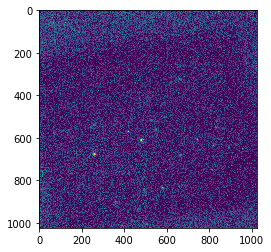

In [11]:
plt.imshow(my_image)
plt.clim(35,55)

# smoothing image

In [48]:
my_kernel = my_image*0
my_kernel[512-10:512+10,512-10:512+10] = 1.0
my_kernel = my_kernel/np.sum(my_kernel)

In [49]:
np.sum(my_kernel)

1.0

In [50]:
my_filtered_image = signal.fftconvolve(my_kernel,my_image,mode='same')

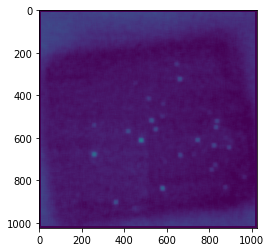

In [51]:
plt.imshow(my_filtered_image)
plt.clim(35,55)

# thresholding image

In [24]:
np.sum(my_filtered_image)

0.0

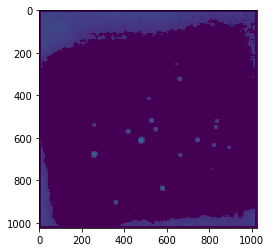

In [62]:
my_mask = my_filtered_image<37.5
my_thresholded_image = my_filtered_image*1
my_thresholded_image[my_mask]=0

plt.imshow(np.real(my_thresholded_image))
plt.clim(35,55)
plt.show()

In [65]:
binary_image=np.around(my_thresholded_image/(1e-14+abs(my_thresholded_image)))

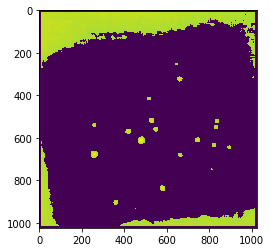

In [66]:
plt.imshow(np.real(my_thresholded_image))
plt.show()

## labeling blobs

In [67]:
lw, num = measurements.label(binary_image)

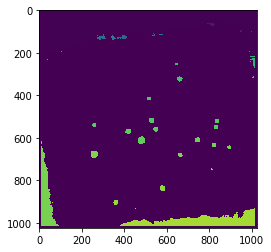

In [68]:
plt.imshow(lw)
plt.show()

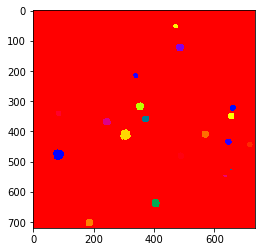

In [85]:
plt.imshow(lw[200:920,175:910],cmap='prism')
plt.clim(132,166)
plt.show()

In [78]:
cluster_labels = set(lw[200:920,175:910].flatten())
print(cluster_labels)
print(len(cluster_labels))

{0, 133, 138, 141, 142, 143, 144, 145, 146, 147, 148, 149, 152, 154, 155, 157, 158, 160, 161, 163, 165}
21


## getting statistics on the blobs

In [103]:

my_dict = {}
my_dict['integrated_intensity'] = []
my_dict['centroid'] = []
my_dict['variance'] = []

x = np.arange(my_image.shape[0])
y = np.arange(my_image.shape[1])

xv,yv = np.meshgrid(x,y)

for i in cluster_labels:
    temp_mask = (lw== i)
    integrated_intensity = np.sum(my_image[temp_mask])
    centroid = np.array([np.sum((xv*my_image)[temp_mask]),np.sum((yv*my_image)[temp_mask])])/integrated_intensity
    variance = np.array([np.sum(((xv-centroid[0])**2*my_image)[temp_mask]),np.sum(((yv-centroid[1])*my_image)[temp_mask])])/integrated_intensity
    
    my_dict['integrated_intensity'].append(integrated_intensity)
    my_dict['centroid'].append(centroid)
    my_dict['variance'].append(variance)
    
my_dict['integrated_intensity'] = np.array(my_dict['integrated_intensity'])
my_dict['centroid']             = np.array(my_dict['centroid'])
my_dict['variance']             = np.array(my_dict['variance'])


In [112]:
my_dict['centroid'][np.argsort(my_dict['centroid'][:,0])]

array([[258.51238145, 676.877043  ],
       [259.10003688, 540.52120597],
       [360.66106674, 901.78804432],
       [418.80620118, 568.79187233],
       [480.2769203 , 610.94795022],
       [514.67136573, 415.44471106],
       [521.6843329 , 543.76550305],
       [528.51710262, 517.73879641],
       [547.76048401, 559.17403167],
       [576.        , 495.        ],
       [580.28185882, 836.93320401],
       [646.58430098, 252.90880941],
       [661.56727913, 323.18751573],
       [663.89339927, 680.91805756],
       [744.84718851, 609.65407565],
       [810.08386916, 747.90746436],
       [821.69960159, 634.9625498 ],
       [829.90116279, 725.56395349],
       [831.26104991, 549.64211886],
       [835.86770648, 521.75537417],
       [892.35647071, 644.06597187]])

## overlaying calculated centroids (white) with thresholded image

In [140]:
np.sort(my_dict['integrated_intensity'])

array([      37,      344,     3577,     6459,     9883,    10002,
          10846,    12374,    13805,    14559,    14706,    16859,
          19405,    19776,    19865,    20867,    21868,    23714,
          38485,    38809, 32404745], dtype=uint64)

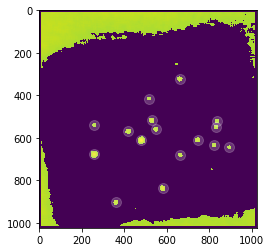

In [168]:
low_fluence_mask = my_dict['integrated_intensity']>7000
low_fluence_mask = low_fluence_mask * (my_dict['integrated_intensity']<40000)

plt.imshow(np.real(my_thresholded_image))
plt.scatter(my_dict['centroid'][:,0][low_fluence_mask],my_dict['centroid'][:,1][low_fluence_mask],s=100,c='w',alpha=0.2)
plt.show()


In [167]:
sum(low_fluence_mask==False)

4

In [165]:
low_fluence_mask

array([False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True])